In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing  all  data set for preprocessing 

In [209]:
btc_df=pd.read_csv("btc_df.csv", parse_dates=['Date'],index_col='Date')

In [210]:
gold_df=pd.read_csv('gold_df.csv',parse_dates=['Date'],index_col='Date')

In [247]:
currency_I_df=pd.read_csv('currecy_I_df.csv',parse_dates=['Date'],index_col='Date')

In [255]:
currency_II_df=pd.read_csv('currecy_II_df.csv',parse_dates=['Date'],index_col='Date')

In [234]:
vix_df=pd.read_csv('cobe_vix_df.csv',parse_dates=['Date'],index_col='Date')

In [224]:
sp500_df=pd.read_csv('SP500_df.csv',parse_dates=['Date'],index_col='Date')

In [217]:
 #btc_df.info()
# btc_df.head()
# btc_df.describe()
print(btc_df.isnull().sum())

BCHAIN/TOTBC      1
BCHAIN/MKTCP      5
BCHAIN/TRFEE      0
BCHAIN/TRFUS      5
BCHAIN/NETDF    709
BCHAIN/NTRAN      0
BCHAIN/NTRAT      0
BCHAIN/NTREP      0
BCHAIN/NADDU      0
BCHAIN/NTRBL      0
BCHAIN/TOUTV      0
BCHAIN/ETRAV      0
BCHAIN/ETRVU      5
BCHAIN/TRVOU      5
BCHAIN/TVTVR    709
BCHAIN/MKPRU      0
BCHAIN/CPTRV      0
BCHAIN/CPTRA      5
BCHAIN/HRATE      1
BCHAIN/MIREV      5
BCHAIN/ATRCT      0
BCHAIN/BCDDC    706
BCHAIN/BCDDE    706
BCHAIN/BCDDW    706
BCHAIN/BCDDM    706
BCHAIN/BCDDY    706
BCHAIN/BLCHS      0
BCHAIN/AVBLS      0
BCHAIN/MWTRV      0
BCHAIN/MWNUS     24
BCHAIN/MWNTD      0
BCHAIN/MIOPM    740
BCHAIN/DIFF       0
dtype: int64


In [218]:
# following the observed missing values , I will drop variables with  higher number of NAs. 
columns_drop=['BCHAIN/NETDF',"BCHAIN/TVTVR","BCHAIN/BCDDC", "BCHAIN/BCDDE","BCHAIN/BCDDW", "BCHAIN/BCDDM","BCHAIN/BCDDY","BCHAIN/MIOPM"]
#df.drop(df.columns[[1, 69]], axis=1, inplace=True)
btc_df.drop(columns_drop, axis=1, inplace=True)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Data columns (total 25 columns):
BCHAIN/TOTBC    3461 non-null float64
BCHAIN/MKTCP    3457 non-null float64
BCHAIN/TRFEE    3462 non-null float64
BCHAIN/TRFUS    3457 non-null float64
BCHAIN/NTRAN    3462 non-null float64
BCHAIN/NTRAT    3462 non-null float64
BCHAIN/NTREP    3462 non-null float64
BCHAIN/NADDU    3462 non-null float64
BCHAIN/NTRBL    3462 non-null float64
BCHAIN/TOUTV    3462 non-null float64
BCHAIN/ETRAV    3462 non-null float64
BCHAIN/ETRVU    3457 non-null float64
BCHAIN/TRVOU    3457 non-null float64
BCHAIN/MKPRU    3462 non-null float64
BCHAIN/CPTRV    3462 non-null float64
BCHAIN/CPTRA    3457 non-null float64
BCHAIN/HRATE    3461 non-null float64
BCHAIN/MIREV    3457 non-null float64
BCHAIN/ATRCT    3462 non-null float64
BCHAIN/BLCHS    3462 non-null float64
BCHAIN/AVBLS    3462 non-null float64
BCHAIN/MWTRV    3462 non-null float64
BCHAIN/MWNUS    3438 non-null float64
B

In [220]:
btc_df=btc_df.asfreq("D")
btc_df.isnull().sum()
# Our data is  has included all the calander days. 
# Now, filling the missing values is the next step. I prefere to propagate a forward fill
btc_df.fillna(method='ffill', inplace=True)

In [225]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


In [226]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,902.989990,934.729980,899.349976,931.799988,931.799988,4048270000
2009-01-05,929.169983,936.630005,919.530029,927.450012,927.450012,5413910000
2009-01-06,931.169983,943.849976,927.280029,934.700012,934.700012,5392620000
2009-01-07,927.450012,927.450012,902.369995,906.650024,906.650024,4704940000
2009-01-08,905.729980,910.000000,896.809998,909.729980,909.729980,4991550000


In [227]:
# I prefer to use the closing price, since i am using the ffill, it is a better approximation 
sp500_close_df=sp500_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
sp500_close_df.info()
sp500_close_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 1 columns):
Close    2387 non-null float64
dtypes: float64(1)
memory usage: 37.3 KB


Close    0
dtype: int64

In [228]:
# resampling/changing frequency and filling na
sp500_close_df=sp500_close_df.asfreq('D', method = 'ffill')
sp500_close_df.info()
# data = data.resample("D").interpolate()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-02 to 2018-06-26
Freq: D
Data columns (total 1 columns):
Close    3463 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [229]:
# Droping the first row of the SP500 to match the start date with the btc_df.
sp500_close_df.drop(sp500_close_df.index[0], inplace=True)
sp500_close_df.rename({'Close':'sp_closing_price'}, axis=1, inplace=True)
sp500_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
sp_closing_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [230]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12759 entries, 1968-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    12758 non-null float64
dtypes: float64(1)
memory usage: 199.4 KB


In [231]:
gold_price_df=gold_df['2009-01-02':]
#gold_price_df.isnull().sum()
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2009-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


In [232]:
gold_price_df=gold_price_df.asfreq("D", method='ffill')
gold_price_df.isnull().sum()
gold_price_df.drop(gold_price_df.index[0], inplace=True)
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
gold_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [233]:
gold_price_df.head()

,gold_price
Date,
2009-01-03,869.75
2009-01-04,869.75
2009-01-05,860.00
2009-01-06,844.00
2009-01-07,864.00


In [235]:
vix_df.info()
vix_close_df=vix_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
vix_close_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


Close    0
dtype: int64

In [236]:
vix_close_df.columns

Index(['Close'], dtype='object')

In [237]:
vix_close_df=vix_close_df.asfreq('D', method='ffill')
vix_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-02 to 2018-06-26
Freq: D
Data columns (total 1 columns):
Close    3463 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [238]:
vix_close_df.drop(vix_close_df.index[0], inplace= True)
vix_close_df.rename({'Close':'vix_closing_price'},axis=1, inplace=True)

In [239]:
vix_close_df.info()
vix_close_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
vix_closing_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


,vix_closing_price
Date,
2009-01-03,39.189999
2009-01-04,39.189999
2009-01-05,39.080002
2009-01-06,38.560001
2009-01-07,43.389999


In [248]:
currency_I_df.head()

,EUR/USD Close,EUR/USD High,EUR/USD Low,USD/JPY Close,USD/JPY High,USD/JPY Low
Date,,,,,,
2009-01-01,1.3954,1.3954,1.3954,90.80,90.80,90.80
2009-01-02,1.3855,1.4050,1.3840,92.21,92.40,90.72
2009-01-05,1.3600,1.3960,1.3546,93.20,93.56,91.80
2009-01-06,1.3527,1.3659,1.3313,93.96,94.65,92.85
2009-01-07,1.3628,1.3747,1.3430,92.68,94.12,92.45


In [249]:
currency_I_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12',
               '2009-01-13', '2009-01-14',
               ...
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18',
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-06-25', '2018-06-26'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)

In [250]:
currency_I_df.columns

Index(['EUR/USD Close', 'EUR/USD High', 'EUR/USD Low', 'USD/JPY Close',
       'USD/JPY High', 'USD/JPY Low'],
      dtype='object')

In [251]:
currency_I_df.drop(['EUR/USD High', 'EUR/USD Low', 
       'USD/JPY High', 'USD/JPY Low'],axis=1, inplace=True)

In [252]:
currency_I_close_df=currency_I_df.asfreq('D', method='ffill')
currency_I_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3464 entries, 2009-01-01 to 2018-06-26
Freq: D
Data columns (total 2 columns):
EUR/USD Close    3464 non-null float64
USD/JPY Close    3464 non-null float64
dtypes: float64(2)
memory usage: 81.2 KB


In [253]:
currency_I_close_df.drop(currency_I_close_df.index[0:2],inplace=True)

In [254]:
currency_I_close_df.head()

,EUR/USD Close,USD/JPY Close
Date,,
2009-01-03,1.3855,92.21
2009-01-04,1.3855,92.21
2009-01-05,1.3600,93.20
2009-01-06,1.3527,93.96
2009-01-07,1.3628,92.68


In [167]:
currency_II_df.head(5)

,Open,High,Low,Close
Date,,,,
2009-01-01,6.8280,6.8280,6.8280,6.8280
2009-01-02,6.8245,6.8245,6.8245,6.8245
2009-01-05,6.8372,6.8372,6.8372,6.8372
2009-01-06,6.8375,6.8375,6.8375,6.8375
2009-01-07,6.8364,6.8364,6.8364,6.8364


In [256]:
currency_II_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12',
               '2009-01-13', '2009-01-14',
               ...
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18',
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-06-25', '2018-06-26'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)

In [169]:
#currency_II_df.resample('D')

In [257]:
currency_II_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2009-01-01 to 2018-06-26
Data columns (total 4 columns):
 Open     2474 non-null float64
 High     2474 non-null float64
 Low      2474 non-null float64
 Close    2474 non-null float64
dtypes: float64(4)
memory usage: 96.6 KB


In [258]:
currency_II_df.isnull().sum()

 Open     0
 High     0
 Low      0
 Close    0
dtype: int64

In [259]:
currency_II_df=currency_II_df.asfreq('D', method='ffill')

In [260]:
currency_II_close_df=currency_II_df.drop([' Open', ' High', ' Low'], axis=1)

In [261]:
currency_II_close_df.drop(currency_II_close_df.index[0:2], inplace=True)

In [262]:
currency_II_close_df.rename({' Close':'USD/CNY Close'},axis=1, inplace=True)

In [263]:
currency_II_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
USD/CNY Close    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [264]:
currency_II_close_df.head()

,USD/CNY Close
Date,
2009-01-03,6.8245
2009-01-04,6.8245
2009-01-05,6.8372
2009-01-06,6.8375
2009-01-07,6.8364


In [265]:
df=[currency_II_close_df, currency_I_close_df, btc_df, gold_price_df, sp500_close_df, vix_close_df]

In [266]:
final_df = pd.concat(df, axis=1)

In [267]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 31 columns):
USD/CNY Close        3462 non-null float64
EUR/USD Close        3462 non-null float64
USD/JPY Close        3462 non-null float64
BCHAIN/TOTBC         3462 non-null float64
BCHAIN/MKTCP         3462 non-null float64
BCHAIN/TRFEE         3462 non-null float64
BCHAIN/TRFUS         3462 non-null float64
BCHAIN/NTRAN         3462 non-null float64
BCHAIN/NTRAT         3462 non-null float64
BCHAIN/NTREP         3462 non-null float64
BCHAIN/NADDU         3462 non-null float64
BCHAIN/NTRBL         3462 non-null float64
BCHAIN/TOUTV         3462 non-null float64
BCHAIN/ETRAV         3462 non-null float64
BCHAIN/ETRVU         3462 non-null float64
BCHAIN/TRVOU         3462 non-null float64
BCHAIN/MKPRU         3462 non-null float64
BCHAIN/CPTRV         3462 non-null float64
BCHAIN/CPTRA         3462 non-null float64
BCHAIN/HRATE         3461 non-null float64
BCHAIN/

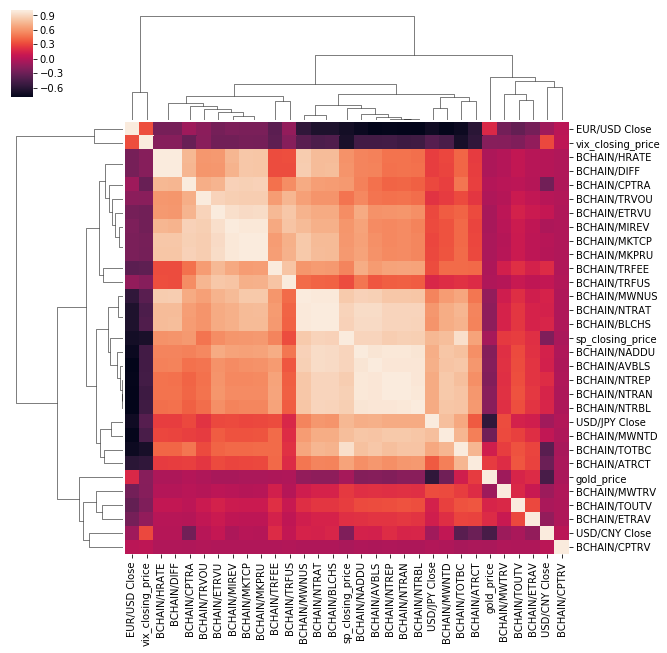

In [269]:
# #Get correlation matrix of the meat DataFrame
final_df_corr = final_df.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(final_df_corr,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show() 

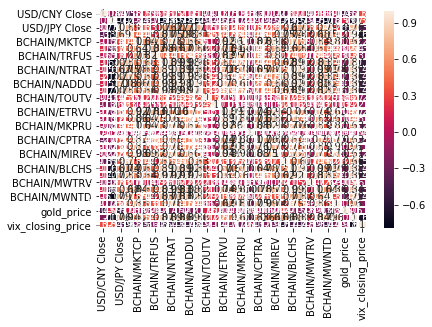

In [274]:
# Get correlation matrix of the meat DataFrame
final_df_corr = final_df.corr(method='pearson')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(final_df_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [271]:
final_df_corr

,USD/CNY Close,EUR/USD Close,USD/JPY Close,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,...,BCHAIN/ATRCT,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/DIFF,gold_price,sp_closing_price,vix_closing_price
USD/CNY Close,1.000000,-0.083895,-0.074604,-0.378536,0.015088,0.194962,0.065125,0.163369,0.152405,0.205932,...,-0.296884,0.167818,0.144123,-0.099271,0.158887,0.061463,0.007582,-0.450395,-0.213337,0.319712
EUR/USD Close,-0.083895,1.000000,-0.720502,-0.731995,-0.235441,-0.368441,-0.129577,-0.781128,-0.646219,-0.778831,...,-0.592882,-0.646026,-0.787973,-0.267440,-0.566601,-0.778067,-0.251221,0.186784,-0.699949,0.338894
USD/JPY Close,-0.074604,-0.720502,1.000000,0.685029,0.307175,0.329168,0.174990,0.702499,0.615309,0.703231,...,0.383576,0.607417,0.721150,0.328126,0.542686,0.791025,0.277962,-0.566519,0.756029,-0.393722
BCHAIN/TOTBC,-0.378536,-0.731995,0.685029,1.000000,0.436000,0.446112,0.224489,0.814893,0.749026,0.792740,...,0.754332,0.739410,0.825132,0.272066,0.678272,0.753860,0.422292,0.129064,0.942734,-0.675264
BCHAIN/MKTCP,0.015088,-0.235441,0.307175,0.436000,1.000000,0.638742,0.726443,0.566027,0.775396,0.557812,...,0.311002,0.773971,0.593511,0.010095,0.835608,0.352701,0.826850,-0.032945,0.621022,-0.248721
BCHAIN/TRFEE,0.194962,-0.368441,0.329168,0.446112,0.638742,1.000000,0.815150,0.677357,0.629543,0.665644,...,0.438705,0.623575,0.635123,0.137531,0.610174,0.443781,0.330282,-0.023964,0.538404,-0.356321
BCHAIN/TRFUS,0.065125,-0.129577,0.174990,0.224489,0.726443,0.815150,1.000000,0.402875,0.414748,0.394050,...,0.195085,0.410409,0.365623,0.009322,0.440903,0.207199,0.328204,-0.019753,0.334374,-0.184474
BCHAIN/NTRAN,0.163369,-0.781128,0.702499,0.814893,0.566027,0.677357,0.402875,1.000000,0.893588,0.993768,...,0.615197,0.891318,0.973986,0.227945,0.829545,0.832629,0.470815,-0.171950,0.869268,-0.501671
BCHAIN/NTRAT,0.152405,-0.646219,0.615309,0.749026,0.775396,0.629543,0.414748,0.893588,1.000000,0.893987,...,0.539798,0.999686,0.923974,0.158580,0.988978,0.712502,0.781611,-0.149799,0.885896,-0.429054
BCHAIN/NTREP,0.205932,-0.778831,0.703231,0.792740,0.557812,0.665644,0.394050,0.993768,0.893987,1.000000,...,0.579989,0.892570,0.972217,0.220964,0.830501,0.832024,0.466930,-0.204262,0.857897,-0.474727


In [177]:
# Rolling window can help us to see either the sort term or the long term trend
#sp500_df.rolling(window=30).agg(['mean', 'std']).plot(subplots=True, figsize=(20,16),sharey=False, layout=(4,4), )

# Compare the performance of several asset classes

# Clean your time series data

In [ ]:
Visualize correlation matrices
The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 


# Import seaborn library
import seaborn  as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

 ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')# can help to define the locatio of the legend 

In [ ]:
Clustered heatmaps
Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels()
         
 # Import seaborn library
import seabon as sn

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clusermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()    

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()